In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.shape

(550068, 12)

In [4]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [8]:
users=pd.DataFrame()
users['Number of Purchases'] = df.groupby('User_ID').size()
users['Sum spent'] = df.groupby('User_ID')['Purchase'].sum()
users=users.sort_values(by='Sum spent', ascending=False)
users

,Number of Purchases,Sum spent
User_ID,,
1004277,979,10536909
1001680,1026,8699596
1002909,718,7577756
1001941,898,6817493
1000424,694,6573609
...,...,...
1004991,7,52371
1005117,9,49668
1003883,9,49349


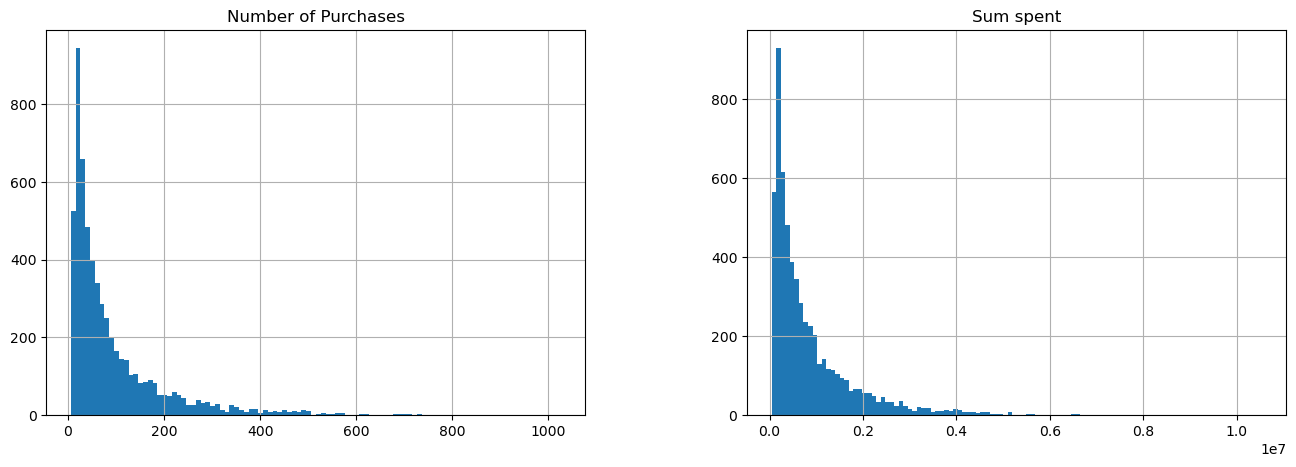

In [9]:
users.hist(figsize=(16,5), bins='auto')
plt.show()

In [10]:
prods=pd.DataFrame()
prods['Number of Purchases'] = df.groupby('Product_ID').size()
prods['Sum spent'] = df.groupby('Product_ID')['Purchase'].sum()
prods=prods.sort_values(by='Sum spent', ascending=False)
prods

,Number of Purchases,Sum spent
Product_ID,,
P00025442,1615,27995166
P00110742,1612,26722309
P00255842,1383,25168963
P00059442,1406,24338343
P00184942,1440,24334887
...,...,...
P00012942,1,1717
P00325342,1,1656
P00353042,1,1545


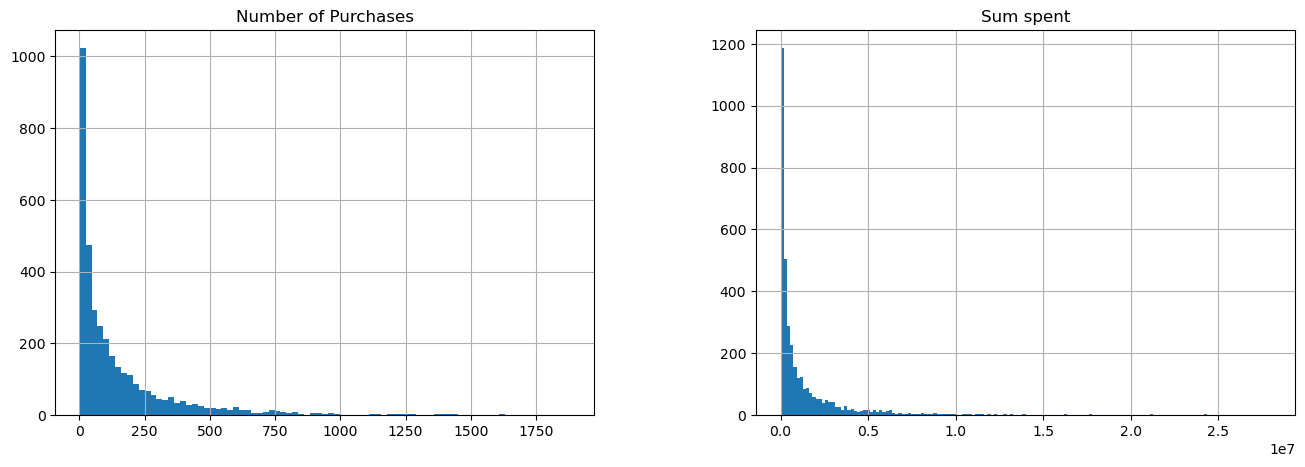

In [11]:
prods.hist(figsize=(16,5), bins='auto')
plt.show()

In [12]:
prods_cat=pd.DataFrame()
prods_cat['Number of Purchases'] = df.groupby('Product_Category_1').size()
prods_cat['Sum spent'] = df.groupby('Product_Category_1')['Purchase'].sum()
prods_cat=prods_cat.sort_values(by='Sum spent', ascending=False)
prods_cat

,Number of Purchases,Sum spent
Product_Category_1,,
1,140378,1910013754
5,150933,941835229
8,113925,854318799
6,20466,324150302
2,23864,268516186
3,20213,204084713
16,9828,145120612
11,24287,113791115
10,5125,100837301


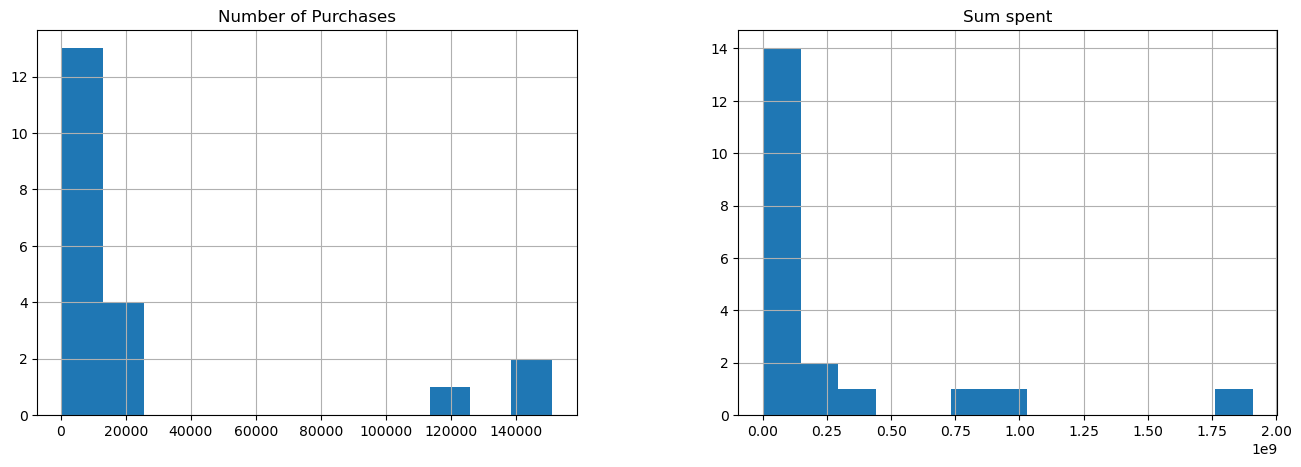

In [13]:
prods_cat.hist(figsize=(16,5), bins='auto')
plt.show()